In [1]:
! pip install -q kaggle

from google.colab import files

files.upload()

! mkdir ~/.kaggle

! cp kaggle.json ~/.kaggle/

! chmod 600 ~/.kaggle/kaggle.json

! kaggle datasets list


Saving kaggle.json to kaggle.json
ref                                                           title                                                size  lastUpdated          downloadCount  
------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  
allen-institute-for-ai/CORD-19-research-challenge             COVID-19 Open Research Dataset Challenge (CORD-19)    3GB  2020-07-06 18:49:31          86098  
roche-data-science-coalition/uncover                          UNCOVER COVID-19 Challenge                          179MB  2020-05-21 18:57:53          14966  
oleksastepaniuk/prozorro-public-procurement-dataset           ProZorro. Ukrainian public procurement dataset      448MB  2020-04-15 17:09:37              4  
navinmundhra/daily-power-generation-in-india-20172020         Daily Power Generation in India (2017-2020)          63KB  2020-06-29 17:13:29             73  
imdevskp/cholera-d

In [2]:
!kaggle datasets download -d shayanfazeli/heartbeat

 96% 95.0M/98.8M [00:01<00:00, 73.9MB/s]
100% 98.8M/98.8M [00:01<00:00, 92.7MB/s]


In [3]:
!unzip /content/heartbeat.zip

Archive:  /content/heartbeat.zip
  inflating: mitbih_test.csv         
  inflating: mitbih_train.csv        
  inflating: ptbdb_abnormal.csv      
  inflating: ptbdb_normal.csv        


In [4]:
import os
os.listdir('/content/')

['.config',
 'kaggle.json',
 'ptbdb_abnormal.csv',
 'ptbdb_normal.csv',
 'mitbih_train.csv',
 'heartbeat.zip',
 'mitbih_test.csv',
 'sample_data']

In [5]:
import pandas as pd
df1= pd.read_csv('/content/mitbih_train.csv',header=None)
df2= pd.read_csv('/content/mitbih_test.csv',header=None)


In [6]:
df=pd.concat([df1,df2])

In [7]:
df


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,0.044118,0.061275,0.066176,0.061275,0.049020,0.073529,0.061275,0.061275,0.066176,0.068627,0.095588,0.075980,0.093137,0.105392,0.115196,0.102941,0.117647,0.125000,0.142157,0.127451,0.151961,0.144608,0.164216,0.144608,0.159314,0.151961,0.154412,0.142157,0.151961,0.151961,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,0.074074,0.062678,0.065527,0.065527,0.062678,0.076923,0.071225,0.082621,0.091168,0.096866,0.082621,0.082621,0.091168,0.105413,0.122507,0.148148,0.182336,0.193732,0.213675,0.207977,0.222222,0.253561,0.270655,0.287749,0.284900,0.293447,0.256410,0.247863,0.188034,0.145299,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,0.056757,0.043243,0.067568,0.062162,0.078378,0.072973,0.086486,0.081081,0.108108,0.110811,0.135135,0.135135,0.170270,0.183784,0.216216,0.237838,0.270270,0.286486,0.316216,0.318919,0.332432,0.297297,0.267568,0.216216,0.189189,0.132432,0.118919,0.064865,0.064865,0.043243,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,0.063536,0.082873,0.085635,0.093923,0.113260,0.124309,0.140884,0.132597,0.140884,0.091160,0.085635,0.074586,0.071823,0.080110,0.096685,0.118785,0.138122,0.140884,0.138122,0.146409,0.110497,0.102210,0.060773,0.027624,0.038674,0.013812,0.011050,0.013812,0.033149,0.005525,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,0.131455,0.122066,0.140845,0.159624,0.150235,0.145540,0.136150,0.169014,0.178404,0.173709,0.183099,0.201878,0.187793,0.164319,0.187793,0.215962,0.215962,0.201878,0.211268,0.230047,0.215962,0.230047,0.239437,0.267606,0.253521,0.230047,0.220657,0.225352,0.211268,0.173709,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21887,0.928736,0.871264,0.804598,0.742529,0.650575,0.535632,0.394253,0.250575,0.140230,0.102299,0.075862,0.032184,0.000000,0.012644,0.119540,0.243678,0.310345,0.367816,0.412644,0.434483,0.502299,0.533333,0.563218,0.627586,0.671264,0.685057,0.679310,0.679310,0.677011,0.681609,0.690805,0.700000,0.713793,0.736782,0.752874,0.771264,0.783908,0.800000,0.806897,0.813793,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
21888,0.802691,0.692078,0.587444,0.446936,0.318386,0.189836,0.118087,0.077728,0.112108,0.152466,0.289985,0.376682,0.412556,0.452915,0.529148,0.582960,0.641256,0.662182,0.678625,0.684604,0.695067,0.699552,0.710015,0.704036,0.726457,0.7354

In [8]:
df[187].value_counts()

0.0    90589
4.0     8039
2.0     7236
1.0     2779
3.0      803
Name: 187, dtype: int64

In [9]:
from sklearn.utils import resample
df_1=df[df
        [187]==1]
df_2=df[df[187]==2]
df_3=df[df[187]==3]
df_4=df[df[187]==4]
df_0=(df[df[187]==0])
df_0_upsample=resample(df_0,replace=True,n_samples=20000,random_state=122)
df_1_upsample=resample(df_1,replace=True,n_samples=20000,random_state=123)
df_2_upsample=resample(df_2,replace=True,n_samples=20000,random_state=124)
df_3_upsample=resample(df_3,replace=True,n_samples=20000,random_state=125)
df_4_upsample=resample(df_4,replace=True,n_samples=20000,random_state=126)

df=pd.concat([df_0_upsample,df_1_upsample,df_2_upsample,df_3_upsample,df_4_upsample])





In [10]:
df.shape

(100000, 188)

In [21]:
X = df.values[:,:186]
Y= df.values[187].astype(int)

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size=0.2, random_state=42,shuffle=True)

In [13]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(80000, 187)
(20000, 187)
(80000,)
(20000,)


In [14]:
from keras.utils.np_utils import to_categorical
Y_train=to_categorical(y_train,5)
Y_test=to_categorical(y_test,5)

Using TensorFlow backend.


In [15]:
X_train = X_train.reshape(len(X_train), X_train.shape[1],1)
X_test = X_test.reshape(len(X_test), X_test.shape[1],1)

In [16]:
print(X_train.shape)
print(X_test.shape)

(80000, 187, 1)
(20000, 187, 1)


In [17]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D,BatchNormalization,Flatten,MaxPool1D,Dense
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
model=Sequential()
input=(187,1)
model.add(Conv1D(32,(3),strides=(1),padding='same',activation='relu',input_shape=input))
model.add(BatchNormalization())
model.add(MaxPool1D(2))
model.add(Conv1D(64,(3),strides=(1),padding='same',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool1D(2))
model.add(Conv1D(64,(3),strides=(1),padding='same',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool1D(2))
model.add(Flatten())
model.add(Dense(512,activation='relu', kernel_initializer='he_normal'))
model.add(Dense(5,activation='softmax'))


In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 187, 32)           128       
_________________________________________________________________
batch_normalization (BatchNo (None, 187, 32)           128       
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 93, 32)            0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 93, 64)            6208      
_________________________________________________________________
batch_normalization_1 (Batch (None, 93, 64)            256       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 46, 64)            0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 46, 64)            1

In [19]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [20]:
callbacks = [EarlyStopping(monitor='val_loss', patience=8),
             ModelCheckpoint(filepath='best_model.h5', monitor='val_loss', save_best_only=True)]

history=model.fit(X_train, Y_train,epochs=5,callbacks=callbacks, batch_size=32,validation_data=(X_test,Y_test))

Epoch 1/5
2500/2500 [==============================] - 83s 33ms/step - loss: 0.2041 - accuracy: 0.9311 - val_loss: 0.1122 - val_accuracy: 0.9604
Epoch 2/5
2500/2500 [==============================] - 79s 32ms/step - loss: 0.0818 - accuracy: 0.9721 - val_loss: 0.1061 - val_accuracy: 0.9653
Epoch 3/5
2500/2500 [==============================] - 78s 31ms/step - loss: 0.0531 - accuracy: 0.9823 - val_loss: 0.0652 - val_accuracy: 0.9778
Epoch 4/5
2500/2500 [==============================] - 79s 31ms/step - loss: 0.0419 - accuracy: 0.9868 - val_loss: 0.0337 - val_accuracy: 0.9913
Epoch 5/5
2500/2500 [==============================] - 84s 34ms/step - loss: 0.0304 - accuracy: 0.9903 - val_loss: 0.0865 - val_accuracy: 0.9722


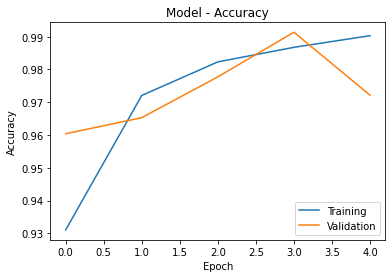

In [22]:
import matplotlib.pyplot as plt
y_pred=model.predict(X_test)
fig1, ax_acc = plt.subplots()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model - Accuracy')
plt.legend(['Training', 'Validation'], loc='lower right')
plt.show()

In [31]:
target_names=['0','1','2','3','4']
import numpy as np
from sklearn.metrics import confusion_matrix 
y_true=[]
for element in Y_test:
    y_true.append(np.argmax(element))
prediction_proba=model.predict(X_test)
prediction=np.argmax(prediction_proba,axis=1)
prediction.reshape(len(prediction),1)
cnf_matrix = confusion_matrix(y_true, prediction)

(20000, 5)


In [34]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


Normalized confusion matrix


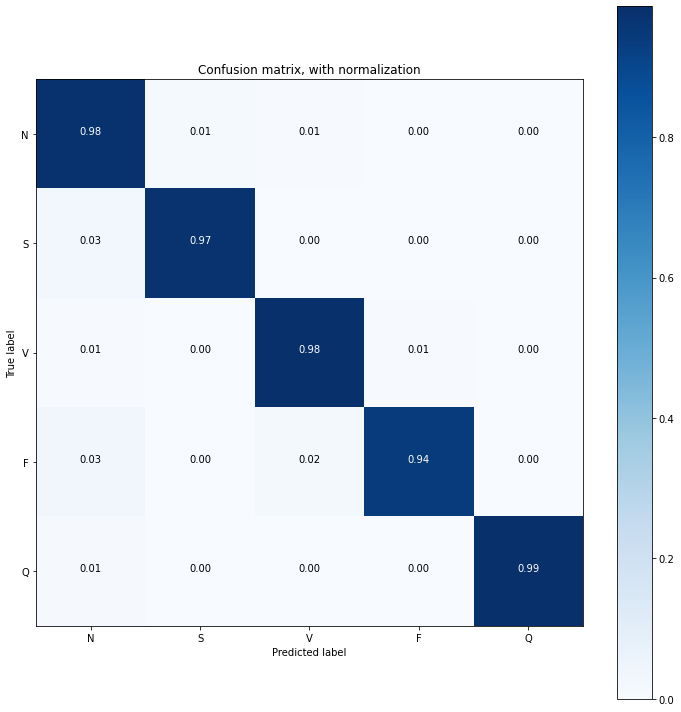

In [35]:
plt.figure(figsize=(10, 10))
plot_confusion_matrix(cnf_matrix, classes=['N', 'S', 'V', 'F', 'Q'],normalize=True,
                      title='Confusion matrix, with normalization')
plt.show()